In [441]:
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools
import random

In [442]:
cards = 40
suits = 4
rare_suit = 8
uncommon_suit = 10
common_suit = 12
prior = 1/4

In [443]:
def p_individual_suit(obs):
    remaining_hand = 10 - obs
    c_hands = math.comb(40, 10)
    c_hands_common = math.comb(common_suit, obs)*math.comb(40-common_suit, remaining_hand)
    c_hands_uncommon = math.comb(uncommon_suit, obs)*math.comb(40-uncommon_suit, remaining_hand)
    c_hands_rare = math.comb(rare_suit, obs)*math.comb(40-rare_suit, remaining_hand)
   
    p_obs_knowing_common = c_hands_common/c_hands
    p_obs_knowing_uncommon = c_hands_uncommon/c_hands
    p_obs_knowing_rare = c_hands_rare/c_hands 
    p_obs = p_obs_knowing_common*1/4 + p_obs_knowing_rare*1/4 + 1/2*p_obs_knowing_uncommon

    p_common_knowing_obs = prior*p_obs_knowing_common/p_obs
    p_unco_knowing_obs = prior*p_obs_knowing_uncommon/p_obs
    p_rare_knowing_obs = prior*p_obs_knowing_rare/p_obs
    return [p_common_knowing_obs, p_unco_knowing_obs*2, p_rare_knowing_obs]

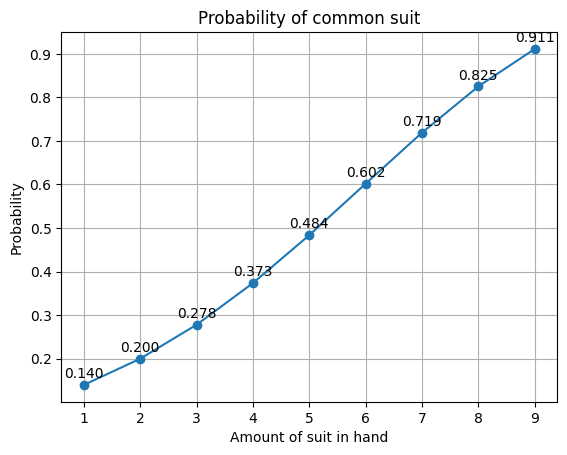

In [444]:
hands = np.arange(1, 10, 1)
p_hands = [p_individual_suit(h)[0] for h in hands]
plt.plot(hands, p_hands, '-o')  # Add dots to line
plt.title('Probability of common suit')
plt.grid(True)  # Add grid
plt.xlabel('Amount of suit in hand')
plt.ylabel('Probability')

# Add value labels for each point
for i, j in zip(hands, p_hands):
    plt.annotate(f'{j:.3f}', 
                xy=(i, j), 
                xytext=(0, 5),
                textcoords='offset points',
                ha='center')

plt.show()

# Input your hand

In [445]:
hand = {
    'spades': 1,
    'clubs': 0,
    'diamonds': 1,
    'hearts': 6
}

In [446]:
def get_compl(suit):
    if suit == 'spades':
        return 'clubs'
    elif suit == 'hearts':
        return 'diamonds'
    elif suit == 'diamonds':
        return 'hearts'
    elif suit == 'clubs':
        return 'spades'

In [447]:
# def p_goal_suit(obs):
#     p_common = {
#         'spades': p_common_suit(obs["spades"]),
#         'clubs': p_common_suit(obs["clubs"]),
#         'diamonds': p_common_suit(obs["diamonds"]),
#         'hearts': p_common_suit(obs["hearts"])
#     }

#     p_goals = {}



#     for suit, p in obs.items():
#         p_goal = 1/4
#         p_not_common = 1-p
#         p_compl_common_knowing_not_common = p_common[get_compl(suit)] # not sure
#         p_not_common_and_compl_common = p_not_common * p_compl_common_knowing_not_common 
#         p_obs_knowing_goal = p_not_common_and_compl_common
#         p_obs = 

#         p_goal_knowing_obs = p_goal * p_obs_knowing_goal / p_obs

#         p_goals[suit] = p_goal_knowing_obs

#     return p_goals
    

In [448]:
# for suit, obs in hand.items():
#     [p, _, _] = p_common_suit(obs)
#     print(f"Probability that {get_compl(suit)} is the goal suit: {round(p, 2)}") 

In [449]:
global_obs = {
    'spades': 1,
    'clubs': 1,
    'hearts': 1,
    'diamonds': 2
}

In [450]:
def get_ccompl(suit):
    if suit == 'spades' or suit == 'clubs':
        return 'hearts' if suit == 'spades' else 'diamonds'
    else:
        return 'spades' if suit == 'hearts' else 'clubs'

In [451]:
def p_hand_suit(hand, suit):
    [common, unco, rare] = p_individual_suit(hand[suit])


    p_obs_knowing_commons = [p_individual_suit(hand[s[0]])[1]*p_individual_suit(hand[s[1]])[1]*p_individual_suit(hand[s[2]])[2]*math.comb(common_suit, hand[suit])*math.comb(uncommon_suit, hand[s[0]])*math.comb(uncommon_suit, hand[s[1]])*math.comb(rare_suit, hand[s[2]])/math.comb(40, 10) for s in list(itertools.permutations([s for s in hand.keys() if s != suit]))]
    p_obs_knowing_uncommons = [p_individual_suit(hand[s[0]])[0]*p_individual_suit(hand[s[1]])[1]*p_individual_suit(hand[s[2]])[2]*math.comb(uncommon_suit, hand[suit])*math.comb(common_suit, hand[s[0]])*math.comb(uncommon_suit, hand[s[1]])*math.comb(rare_suit, hand[s[2]])/math.comb(40, 10) for s in list(itertools.permutations([s for s in hand.keys() if s != suit]))]
    p_obs_knowing_rares = [p_individual_suit(hand[s[0]])[0]*p_individual_suit(hand[s[1]])[1]*p_individual_suit(hand[s[1]])[2]*math.comb(rare_suit, hand[suit])*math.comb(common_suit, hand[s[0]])*math.comb(uncommon_suit, hand[s[1]])*math.comb(uncommon_suit, hand[s[2]])/math.comb(40, 10) for s in list(itertools.permutations([s for s in hand.keys() if s != suit]))]
    p_obs_knowing_common = sum(p_obs_knowing_commons)
    p_obs_knowing_rare = sum(p_obs_knowing_rares)
    p_obs_knowing_uncommon = sum(p_obs_knowing_uncommons)
    p_obs = common*p_obs_knowing_common + 2*unco*p_obs_knowing_uncommon + rare*p_obs_knowing_rare 

    return [
        common*p_obs_knowing_common/p_obs,
        unco*p_obs_knowing_uncommon/p_obs*2,
        rare*p_obs_knowing_rare/p_obs
    ]

In [452]:
# def p_global_common_suit(suit):
#     [p_common, p_unco, p_rare] = p_common_suit(hand[suit])
#     p_obs_knowing_common = math.comb(common_suit-hand[suit], global_obs[suit])
#     p_obs_knowing_unco = math.comb(uncommon_suit-hand[suit], global_obs[suit])
#     p_obs_knowing_rare = math.comb(rare_suit-hand[suit], global_obs[suit])
#     p_obs = p_common*p_obs_knowing_common + p_rare*p_obs_knowing_rare + p_unco*p_obs_knowing_unco
#     p_common_knowing_obs = p_common * p_obs_knowing_common/p_obs
#     return p_common_knowing_obs

In [453]:
# print('clubs: ', p_hand_suit('spades')[0]*10)
# print('diamonds: ', p_hand_suit('hearts')[0]*10)
# print('hearts: ', p_hand_suit('diamonds')[0]*10)
# print('spades: ', p_hand_suit('clubs')[0]*10)


# sum([p_hand_suit(hand, suit)[0] for suit in hand.keys()])

In [454]:
def random_hand():
    suits = ['spades', 'clubs', 'hearts', 'diamonds']
    s_common_suit = suits[random.randint(0, 3)]
    uncommon_suit_1 = [s for s in suits if s != s_common_suit][random.randint(0,2)]
    uncommon_suit_2 = [s for s in suits if s != s_common_suit and s!= uncommon_suit_1][random.randint(0,1)]
    rare_suit = [s for s in suits if s != s_common_suit and s != uncommon_suit_1 and s != uncommon_suit_2][0]
    deck = [12, 10, 10, 8]
    suits_in_order = [s_common_suit, uncommon_suit_1, uncommon_suit_2, rare_suit]
    hand = {'spades': 0, 'clubs': 0, 'hearts': 0, 'diamonds': 0}
    for _ in range(10):
        suit_i = random.randint(0,3)
        while deck[suit_i]-1 == 0:
           suit_i = random.randint(0,3) 
        suit = suits_in_order[suit_i]
        deck[suit_i]=deck[suit_i]-1
        hand[suit]+=1
    assert(hand['spades']+hand['clubs']+hand['hearts']+hand['diamonds'] == 10)
    assert(sum(deck) == 30)
    return [hand, suits_in_order[0]]


In [455]:
def guess_common_suit(hand):
    suits = ['hearts', 'spades', 'clubs', 'diamonds']
    p = [p_hand_suit(hand, suit)[0] for suit in suits]
    mp = 0 
    for i in range(0, len(p)):
        if p[i] >= p[mp]:
            mp = i
    return [suits[mp], round(p[mp], 2)]

In [456]:
found_common_suit = []
for i in range(10000):
    [hand, c] = random_hand()
    guess = guess_common_suit(hand)
    found_common_suit.append(1 if guess[0] == c else 0)
success_rate = sum(found_common_suit)/len(found_common_suit)

f"{round(success_rate*100, 2)}%"

'25.13%'